[0.0, 0.25, 0.5, 0.75]


<IPython.core.display.Javascript object>


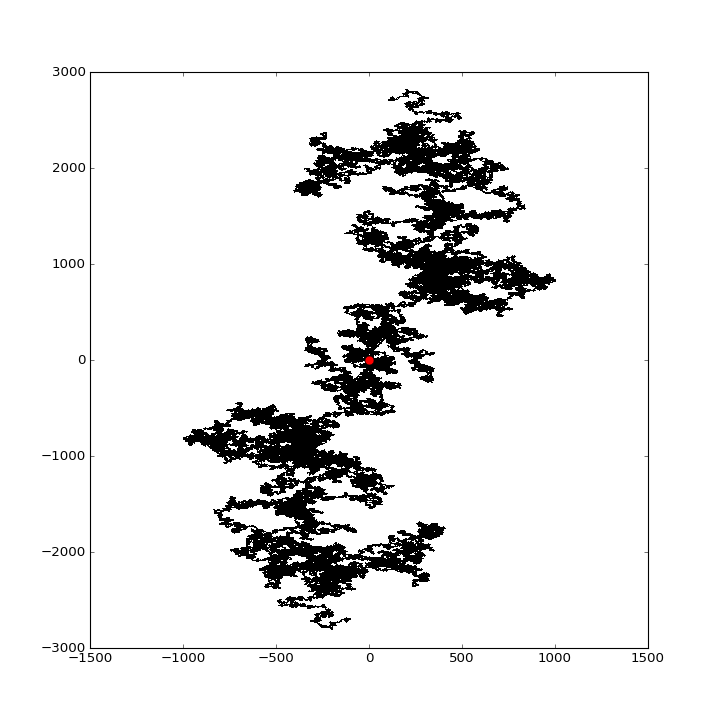

In [25]:
# Generates a Chaos Game attractor using the specified N vertices
# of a regular polygon (N-gon) and a value for R that specifies
# the fraction of the distance to travel from the current location 
# to a randomly chosen vertex.

# This version makes a single plot in the jupyter notebook. 
# v. 1a1b plots the N-gon vertices more sensibly.

%matplotlib notebook
from pylab import *
import random as rd
import math

# Number of vertices of the regular polygon (N-gon)
N = 4

# Fraction of the distance to traverse each iteration
#     (the inverse of the 'compression ratio')
# When R is between 0 and 1, the attractor will exist within the N-gon. 
# When R is between 1 and just shy of 2, it will be mostly outside the N-gon. 
# When R is right around 2 (1.99999999 to 2.00000001 or so), interesting things happen.
# When R is > 2.0000001 or so, the iteration explodes.
R = 1.99999999

def unitCircleXY(point):
    '''
    Take one point from the N evenly spaced values from 0 to 1
    stored in pointList and returns the x, y coordinate of 
    the corresponding N-gon vertex on the unit circle.
    '''
    theta = 2*math.pi*point
    x = math.cos(theta)
    y = math.sin(theta)
    return x, y

def randomChoice(pointList):
    '''
    Randomly choose one of the N evenly spaced values from 0 to 1
    stored in pointList, get the x, y coordinate of the
    N-gon vertex from unitcircleXY(), and return a tuple of (x, y).
    '''
    point = rd.choice(pointList)
    x, y = unitCircleXY(point)
    return (x, y)

def makeYourMove(currentPoint, circlePoint):
    '''
    Starting at currentPoint, move in the direction of the randomly
    chosen circlePoint, and travel a distance corresponding to the constant R,
    the fraction of the distance to travel between the two positions. 
    '''
    locationX = currentPoint[0] + ((circlePoint[0]-currentPoint[0])*R)
    locationY = currentPoint[1] + ((circlePoint[1]-currentPoint[1])*R)
    return (locationX, locationY)

startingPoint = (0,0)

xList = []
yList = []

# generate pointList, containing N evenly spaced numbers between 
# 0 and 1, including 0 but not 1.
pointList = []
for i in range(N):
    pointList.append(i*(1.0/N))
print(pointList)

a = 0
while a < 1000000:
    if a == 0:
        randomCirclePoint = randomChoice(pointList)
        currentPoint = makeYourMove(startingPoint, randomCirclePoint)
    else:
        randomCirclePoint = randomChoice(pointList)
        currentPoint = makeYourMove(currentPoint, randomCirclePoint)
    xList.append(currentPoint[0])
    yList.append(currentPoint[1])
    a += 1    

circleListX = []
circleListY = []    
for nn in pointList:
    xx, yy = unitCircleXY(nn)
    circleListX.append(xx)
    circleListY.append(yy)    
   
figure(figsize=(9,9))
plot(xList, yList, 'k,')
plot(circleListX, circleListY, 'ro', markersize=8)
show()
